In [2]:
pip install pythermalcomfort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 2.9 MB/s eta 0:00:00


In [3]:
# IMPORTING THE LIBERARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Thermal comfort equation by IMAC for naturally ventilated buildings 
def imac_nv(t_rmt, t_op_in):
  tn_nv =[0]*8760
  t_comf90up =[0]*8760
  t_comf80up =[0]*8760
  t_comf90low =[0]*8760
  t_comf80low =[0]*8760
  upper90 = 2.4
  lower90 = -2.4
  upper80 = 4.1
  lower80 = -4.1
  outside_range_hour=0
  acceptable_90 = 0
  acceptable_80 = 0
  unacceptable = 0

  for i in range(0,8760):
    if(t_rmt[i]<31 and t_rmt[i]>12.5):
      tn_nv[i] = 0.54*t_rmt[i] + 12.83
      #t_comf90up[i]= t_comf[i]+upper90
      #t_comf90low[i] = t_comf[i]+lower90
      t_comf80up[i] = t_comf[i]+upper80
      t_comf80low[i] = t_comf[i]+lower80
    else:
      outside_range_hour = +1
  for i in range(0,8760):
    if(t_op_in[i] in range(t_comf90up[i],t_comf90low[i])):
      acceptable_90 = +1
    elif(t_op_in[i] in range(t_comf80up[i],t_comf80low[i])):
      acceptable_80 = +1
    else:
      unacceptable = +1
  return (t_comf90low, t_comf90up, t_comf80low, t_comf80up, outside_range_hour, acceptable_90, acceptable_80)



In [5]:
# Thermal comfort equation by IMAC for Free Running/ Mixed Mode buildings 
def imac_mm(t_out, t_op_in):
  tn_imac =[0]*8760
  t_comf90up =[0]*8760
  t_comf80up =[0]*8760
  t_comf90low =[0]*8760
  t_comf80low =[0]*8760
  upper90 = 3.5
  lower90 = -3.5
  upper80 = 5.9
  lower80 = -5.9
  outside_range_hour=0
  acceptable_90 = 0
  acceptable_80 = 0
  unacceptable = 0
  
  for i in range(0,8760):
    if(t_rmt[i]<38.5 and t_rmt[i]>13):
      tn_imac[i] = 0.28*t_rmt[i] + 17.87
      t_comf90up[i]= tn_imac[i]+upper90
      t_comf90low[i] = tn_imac[i]+lower90
      t_comf80up[i] = tn_imac[i]+upper80
      t_comf80low[i] = tn_imac[i]+lower80
    else:
      outside_range_hour = +1
  for i in range(0,8760):
    if(t_op_in[i] in range(t_comf90up[i],t_comf90low[i])):
      acceptable_90 = +1
    elif(t_op_in[i] in range(t_comf80up[i],t_comf80low[i])):
      acceptable_80 = +1
    else:
      unacceptable = +1
  return (t_comf90low, t_comf90up, t_comf80low, t_comf80up, outside_range_hour, acceptable_90, acceptable_80)

In [9]:
# Reading the input data file and storing in ppandas datafrom

dataset = pd.read_csv('Optimized_window+natural.csv')
print(dataset.head())
t_opi = dataset.iloc[:,4].values # operative indoor temp
hour = dataset.iloc[:,0].values 
dbt_out = dataset.iloc[:,1].values
dbt_in = dataset.iloc[:,3].values 
t_mrt = dataset.iloc[:,2].values  # mean radiant temp
t_rmt = dataset.iloc[:,5].values
vel = dataset.iloc[:,6].values 

   Hours  DBT_outdoor      MRT  DBT_indoor  Operative_temp  RMT_outdoor  \
0      1      14.3333  20.2862     20.4310         20.3586      19.8778   
1      2      14.3000  19.6195     19.2312         19.4253      19.8778   
2      3      13.2750  19.4890     20.1218         19.8054      19.8778   
3      4      12.5500  19.3131     19.8955         19.6043      19.8778   
4      5      12.0667  19.0839     19.6291         19.3565      19.8778   

   velocity  
0       0.1  
1       0.1  
2       0.1  
3       0.1  
4       0.1  


In [ ]:
# generating response for ploting
nv_upper90 = 2.4
nv_lower90 = -2.4
nv_upper80 = 4.1
nv_lower80 = -4.1
x = np.arange(min(t_mout), max(t_mout),0.01)

# calculating neutral temperature inside natturally ventillated buildings according to imac

tn_nv = 0.54*x + 12.83
t_nv_90up = tn_nv + nv_upper90
t_nv_90low = tn_nv + nv_lower90
t_nv_80up = tn_nv + nv_upper80
t_nv_80low = tn_nv + nv_lower80

# for mixed mode
mm_upper90 = 3.5
mm_lower90 = -3.5
mm_upper80 = 5.9
mm_lower80 = -5.9

# calculating neutral temperature inside mixed mode building according to imac

tn_mm = 0.28*x + 17.87 
t_mm_90up = t_cmf_mm + mm_upper90
t_mm_90low = t_cmf_mm + mm_lower90
t_mm_80up = t_cmf_mm + mm_upper80
t_mm_80low = t_cmf_mm + mm_lower80

In [ ]:
# plotting the results NV

plt.plot(t_rmt,tn_nv,label='Neutral Temperature')
plt.plot(t_rmt,t_nv_90up,'--',label='90% acceptability')
plt.plot(t_rmt,t_nv_90low,'--')
plt.plot(t_rmt,t_nv_80low)
plt.plot(t_rmt,t_nv_80up,'--',label='80% acceptability')
plt.scatter(t_rmt,t_opi)
plt.xlabel("30-day Outdoor Runing Mean Temperature [C]")
plt.ylabel("Indoor operative Temperature [C]")
plt.title ("IMAC Natural Ventillated building")
plt.legend(loc='best')
plt.show()

In [ ]:
# plotting the results MM

plt.plot(t_rmt,tn_mm)
plt.plot(t_rmt,t_mm_90up)
plt.plot(t_rmt,t_mm_90low)
plt.plot(t_rmt,t_mm_90low)
plt.plot(t_rmt,t_mm_90up)
plt.scatter(t_rmt,t_opi)
plt.xlabel("30-day Outdoor Runing Mean Temperature [C]")
plt.ylabel("Indoor operative Temperature [C]")
plt.title ("IMAC Natural Ventillated building")
plt.show()

In [ ]:
# checking ASHRAE-55 adaptive comfort status
from pythermalcomfort.models import adaptive_ashrae
acceptable80_ashrae = 0
acceptable90_ashrae = 0
hvac_required = 0
outside_ashrae_range_hour = []
for i in range (0,8760):
  results_ashrae55 = adaptive_ashrae(tdb=dbt_in[i], tr=t_mrt[i],t_running_mean=t_rmt[i],v=vel[i],units='SI')
  if results_ashrae55['acceptability_90']==True:
    acceptable90_ashrae = +1
  elif results_ashrae55['acceptability_80']==True:
    acceptable80_ashrae = +1
  elif results_ashrae55['acceptability_80']==np.nan:
    outside_ashrae_range_hour = +1
  else:
    hvac_required = +1



In [ ]:
print("Number of annual hours with 80% people comfortable according to ASHRAE-55 Adaptive model = ",acceptable80_ashrae)
print("Number of annual hours with 90% people comfortable according to ASHRAE-55 Adaptive model = ",acceptable90_ashrae)
print("Number of annual hours outside ASHRAE-55 Adaptive model range = ", outside_ashrae_range_hour)
print("Number of annual hours outside 80% comfortable range according to ASHRAE-55 Adaptive model = ", hvac_required)

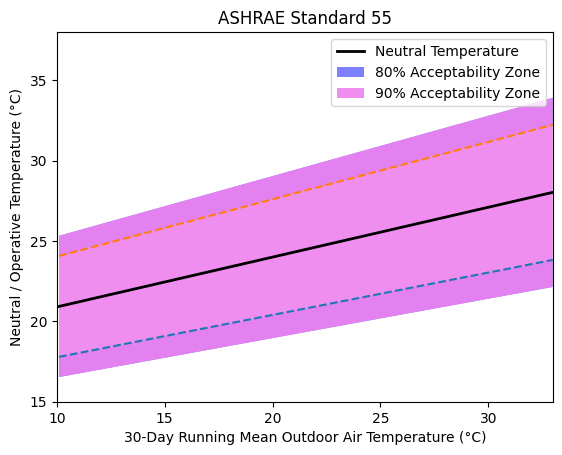

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ASHRAE Standard 55 equation
def ashrae_tn(t_out):
  #if (t_out[i]<=33) and (t_out[i]>=10):
    tn = 0.31 * t_out + 17.8 #enter test check that outdoor temperature is within limits 
    return tn

# Define the 80% acceptability limits equation
def ashrae_tn_limits(t_out):
  for i in range (0,8760):
      tn = ashrae_tn(t_out)
      delta_tn = 0.15 * tn
      tn_lower = tn - delta_tn
      tn_upper = tn + delta_tn
      delta_Tn_90 = 0.21 * tn
      Tn_upper_90 = tn + delta_Tn_90
      Tn_lower_90 = tn - delta_Tn_90
  return tn_lower, tn_upper, Tn_upper_90, Tn_lower_90

# Generate a range of outdoor air temperatures (in Celsius) for 30 days
t_out = np.arange() 
#hourly generated using energyplus

# Calculate the corresponding neutral temperatures and 80% acceptability limits for each outdoor air temperature
tn = ashrae_tn(t_out)
tn_lower_80, tn_upper_80,Tn_upper_90, Tn_lower_90 = ashrae_tn_limits(t_out)

# Plot the results
plt.plot(t_out, tn_lower_80, '--')
plt.plot(t_out, tn_upper_80, '--')
plt.xlabel('30-Day Running Mean Outdoor Air Temperature (°C)')
plt.ylabel('Neutral / Operative Temperature (°C)')
plt.title('ASHRAE Standard 55')
# Plot the neutral temperature and acceptability limits
plt.plot(t_out, tn, 'k', linewidth=2, label='Neutral Temperature')
plt.fill_between(t_out, Tn_lower_90, tn_lower_80, facecolor='blue', alpha=0.5, label='80% Acceptability Zone')
plt.fill_between(t_out, Tn_upper_90, tn_upper_80, facecolor='blue', alpha=0.5)
plt.fill_between(t_out, Tn_lower_90, Tn_upper_90, facecolor='violet', alpha=0.9, label='90% Acceptability Zone')

# Add legend and labels
plt.legend(loc='best')
# Set the axis limits
plt.xlim(10, 33)
plt.ylim(15, 38)

# Show the plot
plt.show()